<a href="https://colab.research.google.com/github/git-hys/Python25Study/blob/main/07_02_%EC%8B%AC%EC%B8%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D(%EB%94%A5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 인공신경망에 층을 추가하여 데이터셋을 분류하면 딥! -> 심층신경망

# 실행마다 동일한 경과를 얻기 위해 케라스에 랜덤 시드를 사용하여 텐서플로 연산을 결정적으로 만듦

import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# 케라스 API에서 패션 MNIST 데이터 셋을 불러옴
# 훈련세트와 테스트 세트를 생성

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
from sklearn.model_selection import train_test_split

# 이미지 픽셀 값이 0~155 범위를 0~1사이로 변환

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)
# 20%의 훈련세트와 검증 센트로 분할

In [5]:
print(test_input.shape, train_target.shape)

(10000, 28, 28) (48000,)


In [6]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [7]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


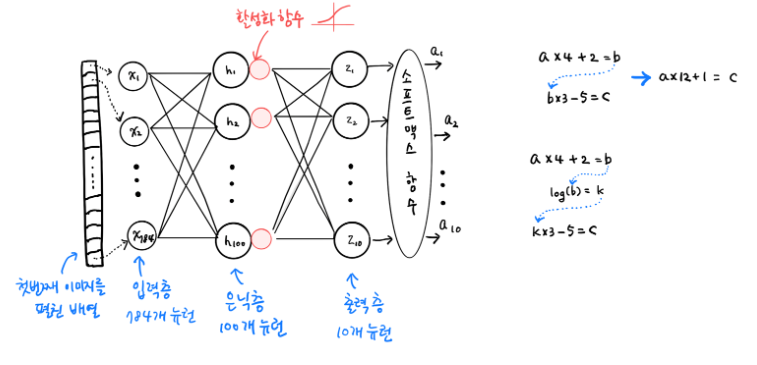

In [8]:
# 인공 신경망 모델에 2개의 레이어를 추가해 보겠다
# 전에 만든 신경망 모델과 다른 점은 입력층과 출력층 사이에 밀집 층이 추가된 것
#   -> 은닉층(hidden layer)
# 은닉층에는 주황색원으로 활성화 함수가 표시되어 있다.
# 활성화 함수는 신경망 층의 선형 방정식 계산 값에 적용하는 함수이다.
# 출력층에 적용하는 활성화 함수는 종류가 제한되어 있음
#   이진분류(시그모이드함수), 다중분류(소프트맥스함수) -> 분류를 위한
# 은닉층은 활성화 함수가 자유롭다 (대표적 : 시그모이드함수, 볼 렐루 함수....)
# a*4+2*b -> b*3-5=c 라고 했을 때  b가 하는 일은 임시용 -> a*12+1=c

# 신경망도 마찬가지로 은닉층에서 선형적인 산술 계산만 수행다면 수행 역할이 없는 셈
# 선형 계산을 적당하게 비선형적으로 비틀어 줘야 함
# 그래야 다음 층의 계산과 단순히 합쳐지지 않고 나름의 역할을 할 수 있다.
# a*4+2*b -> log(b)=k -> k*3-5=c 라고 했을 때 log(b)=k 가 하는 일은?

In [9]:
# 시그모이드 활성화 함수를 사용한 은닉층과 소프트맥스 함수를
# 사용한 출력층을 케라스 Dense 클래스로 만들어 보자.
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
#input_shape=(784,) 입력의 크기 필수
# dense1의 목표 : 784개의 입력을 시그모이드 함수를 이용해서 100개로 만들어봐~
# https://gooopy.tistory.com/52

# dense1 이 은닉층이고 100개의 뉴런을 가진 밀집층, 활성화 함수를 시그모이드로 설정
# 몇개의 뉴런이 필요할 지는 경험적으로 기입
# 제약사항으로는 적어도 출력층의 뉴런보다는 많게 만들어야 한다.
# (클래스 10개에 대한 확률을 예측해야 하는데 은닉층의 뉴런이 10개 이하면 안됨)

dense2 = keras.layers.Dense(10, activation='softmax')
# dense2은 출력층으로 설정 (10개의 클래스를 분류하므로 10개의 뉴런을 둠)
# https://wikidocs.net/120089
# 활성화 함수로 소프트 맥스 함수로 지정

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# 심층 신경망 만들기 (순차적으로 적용하기 위한 모델)
model = keras.Sequential([dense1, dense2]) # 뒤가 출력

# 위에서 만든 dense1, dense2를 Sequential 클래스에 추가하여 심층(deep) 신경망을 만듬
# dense1, dense2를 리스트로 만들어 전달함
# 주의 : 뒤에가 출력층임으로 dense2를 설정
# 인공 신경망의 강력한 성능은 층을 추가하여 입력 데이터에 대해
# 연속적인 학습을 진행하는 능력 -> 2개 이상 층을 추가 가능

In [11]:
model.summary() # 층에 대한 유용한 정보가 나옴

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# 맨 첫줄에 모델의 이름, 그 다음 이 모델이 들어 있는 층이 순서대로 나옴
# 맨 처음 추가한 은닉층에서 출력층의 순서대로 나옴

# 층이름(클래스), 출력크기, 모델 파라미터 개수
# 층이름을 지정하지 않으면 케라스가 자동으로 Dense라고 이름을 붙임
# 출력크기 (None(샘플의 개수: 아직 정의되지 않음), 100)
#    -> 케라스 모델의 fit() 메서드에 훈련 데이터를 주입하면
#       이 데이터를 한번에 모두 사용하지 않고 잘게 나누어
#       여러번 걸쳐 경사 하강법 단계를 수행(미니배치 경사 하강법)
#       케라스의 기본 미니배치 크기는 32개 임

# 이 값은 fit() 메서드에서 batch_szie 매개변수로 변경 가능 따라서
# 샘플 개수를 고정하지 않고 어떤 배치 크기에도 유연하게 대응할 수 있도록 None으로 설정이 최선

# 신경망 층에서 입력되거나 출력되는 배열의 첫 번째 차원을 배치 자원이라고 부름

# 출력크기 (None, 100 -> 은닉층의 뉴런 개수를 100개임으로 100개의 출력이 나옴)
#   -> 샘플마다 784개의 필셀 값이 은닉층을 통과하면서 100개의 특성으로 압축
# 마지막으로 파라미터 개수가 출력됨 784 * 100 + 100 = 78500
# 공식 암기 : 입력개수 * 출력개수(절편) + 출력개수(절편) = 파라미터수

In [ ]:
# 두번째 층의 출력 크기 (None, 10) -> 뉴런 개수가 10개임
# 파라미터는 100 * 10 + 10 = 1010개

# 맨 아래 있는 Non-trainable params: 0 (0.00 B) 는 훈련되지 않는 파라미터
# (간혹 경사 하강법으로 훈련되지 않는 파라미터를 가진 층의 파라미터)

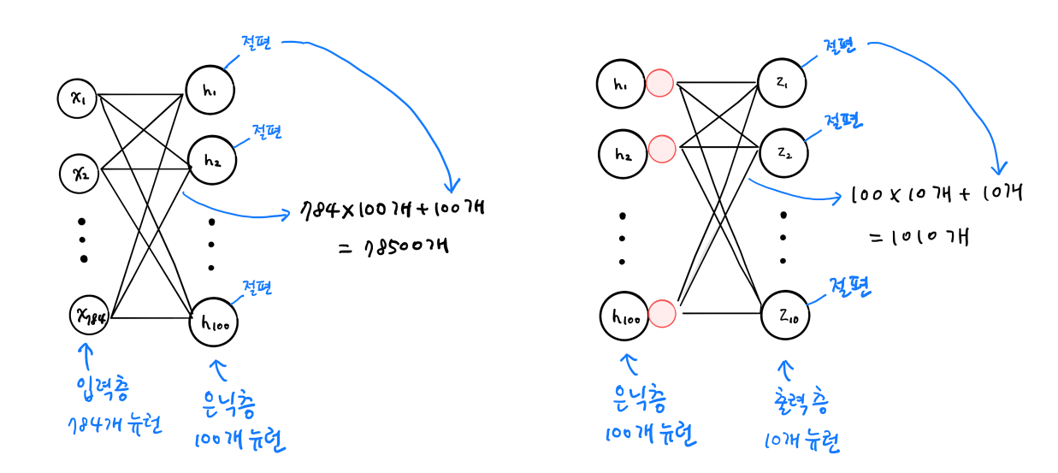

In [13]:
# 모델을 만들면서 층을 추가하는 방법
# Sequential클래스에 층을 추가하는 다른 방법
# 앞에 2개의 Dense는 따로 저장하여 쓸일이 없기 때문에
# 아래 코드처럼 Sequential 클래스의 생성자 안에서 바로 Dense 클래스의 객체를 만드는 경우가 많다.

model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
                                                        # name='hidden' 레이어 이름 정의(영어만!)
    keras.layers.Dense(10, activation='softmax', name='output')], name='패션 MNIST 모델')
                                                                  # 모델의 이름
model.summary()

Model: "패션 MNIST 모델"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden (Dense)                  │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# 층(layer) 추가시 가장 편한 방법은 .add()를 사용한다

model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# 모델 훈련 시작
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7525 - loss: 0.7720
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8463 - loss: 0.4270
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8604 - loss: 0.3857
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8696 - loss: 0.3600
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8759 - loss: 0.3410


In [16]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8733 - loss: 0.3530


[0.35684970021247864, 0.8694999814033508]

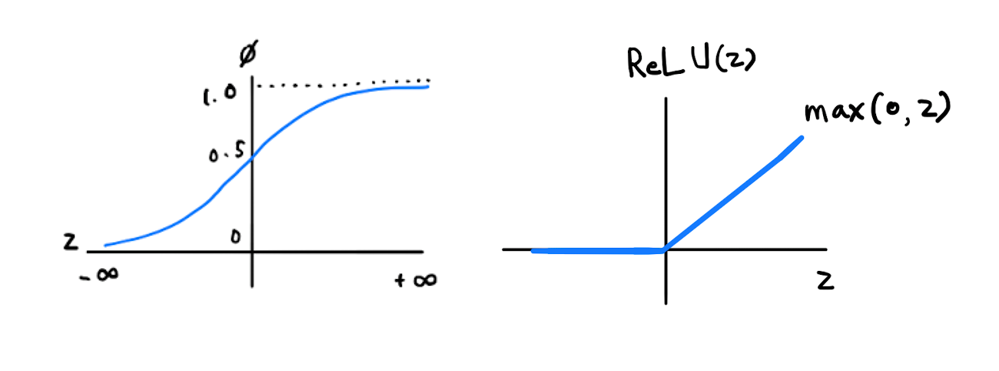

In [17]:
# 초창기 인공 신경망의 은닉층에서 많이 사용된 활성화 함수는 시그모이드 함수였지만
# 단점이 오른쪽, 왼쪽 끝으로 갈수록 그래프가 누워 올바른 출력을 만드는데 신속하게 대응하지 못함.
# 특히 층이 많은 심층 신경망 일수록 그 효과가 누적되어 학습을 더 어렵게 만듬.

# 개선을 위해서 다른 종류의 활성화 함수가 제안 되었는데 바로 렐루(ReLU) 함수임
# 렐루 함수는 입력이 양수 일 경우 마치 활성화 함수가 없는 것 처럼
# 그냥 입력을 통과시키고 음수일 경우 0 으로 만듬.
# 렐루 함수는 max(0, z)와 같이 씀 -> z가 0보다 크면 z를 출력하고 0보다 작으면 0을 출력

# 렐수 함수는 특히 이미지 처리에 좋은 성능을 낸다고 함
# 은닉 층에 활성화 함수에 시그모이드 함수 대신 렐루 함수를 적용하기 전에
# 케라스에서 제공하는 편리한 층 하나를 더 알아볼 필요가 있다. -> Flatten(이미지픽셀용)
# Flatten(플래튼) : 단조롭게하다 ( 28x28 = 784가 아니라 그냥 28,28로 입력함 )
# 클래스는 배치 자원을 제외하고 나머지 입력 차원을 모두 일렬도 펼치는 역할만 함.(가중치, 절편 없음)

# 절편 : 직선이 x축과 만나는 점의 x좌표(x절편) 및 y축과 만나는 점의 y좌표(y절편)를 통틀어 이르는 말
# 하지만 플래튼 클래스를 층처럼 입력층과 은닉층 사이에 추가하기 때문에 이를 층이라고 부름
# 입력층 바로 뒤에 플래튼 층 추가

In [18]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28))) # 입력층 바로 뒤에 플래튼 층 추가
# 플래튼 클래스에 포함된 파라미터는 0개로 케라스의 프래튼 층을 신경망 모델에 추가하면
# 입려값의 차원을 집작 할 수 있음

#(None, 784) 784개의 입력이 첫번째 은닉층에 전달됨을 알 수 있음
model.add(keras.layers.Dense(100, activation='relu')) # 렐루 층 : true/false를 1단계에서 검사
model.add(keras.layers.Dense(10, activation='softmax'))# 소프트 맥스층 : 다중 분류
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# 훈련데이터를 준비해서 모델 훈련 시작
# reshape() 메서드를 제외 -> 2차원 해상도 값을 그대로 사용

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input/255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)


In [20]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


In [21]:
print(train_scaled.shape, train_target.shape)

(48000, 28, 28) (48000,)


In [25]:
print(val_scaled.shape, val_target.shape)

(12000, 28, 28) (12000,)


In [27]:
# 순차적인 모델을 생성한 후 컴파일을 통해서 빠른 처리를 위함
model.compile(loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

# 훈련시작
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7637 - loss: 0.6723
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8519 - loss: 0.4061
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8685 - loss: 0.3613
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8800 - loss: 0.3340
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8874 - loss: 0.3157


In [28]:
model.evaluate(val_scaled, val_target) # 검증 점수 전(87.33%)과 비교해보면 안좋음.

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8651 - loss: 0.3861


[0.38933491706848145, 0.8648333549499512]

In [29]:
# 옵티마이져 : 최적화

# 하이퍼파라미터는 모델이 학습하지 않아 사람이 지정해 주어야 하는 파라미터
# 신경망에는 특히 하이퍼파라미터가 많다.
# 전에는 하나의 은닉층을 추가하였지만 여러 개의 은닉층을 추가할 수도 있다.
# 추가할 은닉층의 개수는 모델이 학습하는 것이 아니라 우리가 지정해 주어야할 하이퍼파라미터임.
# 은닉 층의 뉴런 개수도 우리가 지정하는 것이 하이퍼 파라미터임. (활성화 함수, 층의 종류 포함)

# 케라스는 기본적으로 미니배치 경사 하강법을 사용하며 미니배치 개수는 32개라고 했다.
# 이를 조정하는 batch_size로 하이퍼 파라미터
# fit() 메서드의 epochs(에포크 : 중요한 사건시점) 매개변수도 하이퍼파라미터임.
#   -> 반복한 횟수에 따라 다른 모델이 만들어짐.

# 마지막으로 compile() 메서드에서는 케라스의 기본 경사 하강법 알고리즘인
#   RMSprop(Root Mean Sqaure Propagation의 약자로, 알엠에스프롭(R.M.S.Prop)이라고 읽습니다.)
# 케라스는 다양한 종류의 경사 하강법을 제공하는데 이를 옵티마이저(optimizer:최적화)라고 부름
#   -> 학습률 또한 조정할 하이퍼파라미터임.

# 처음부터 모델을 구성하고 각종 하이퍼파라미터의 최적값을 찾는 것은 어려운 작업임.

# 옵티마이저 테스트1 -> 확률적 경사 하강법 SGD
#   (1개의 샘플을 뽑아 훈련하지 않고 앞서 언급한 것 처럼 기본적인 미니 배치를 사용)

sgd = keras.optimizers.SGD()    # SGD최적화 객체를 생성하여 변수로 넣는 방법
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# optimizer='sgd' 자동으로 클래스를 객체로 만들고 시작함  sgd = keras.optimizers.SGD() 생략 가능
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
sgd = keras.optimizers.SGD(learning_rate=0.1) # 원하는 학습률을 기록(기본 값은 0.01)

# 아래 그림처럼 다양한 최적화 기법이 존재

sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

# 모멘텀(기본0: 그레이덩ㄴ트 가속도 0.9 이상 사용)
# 네스테로프 모멘텀은 모멘텀 최적활르 2번 반복하여 구현
# -> 기본 확률적 경사 하강법보다 더 나은 성능 제공

# 모델이 최적점에 가까이 갈수록 학습률을 낮출 수 있다
# -> 안정적으로 최적점에 수렴(적응적 학습률 : adaptive learning rate)
# 학습률 매개변수를 튜닝하는 수고를 덜어줌

# 적응적 학습률 : adaptive learning rate를 사용하는 대표적인 최적화 기법은 adagrad, RMSprop 가 있다.
# complie() 메서드의 optimizer= adagead, optimizer=rmsprop(기본값)

adagrad = keras.optimizers.Adagrad()

model.compile(optimizer=adagrad, loss='s[arse_categorical_crossentropy]', metrics=['accuracy'])

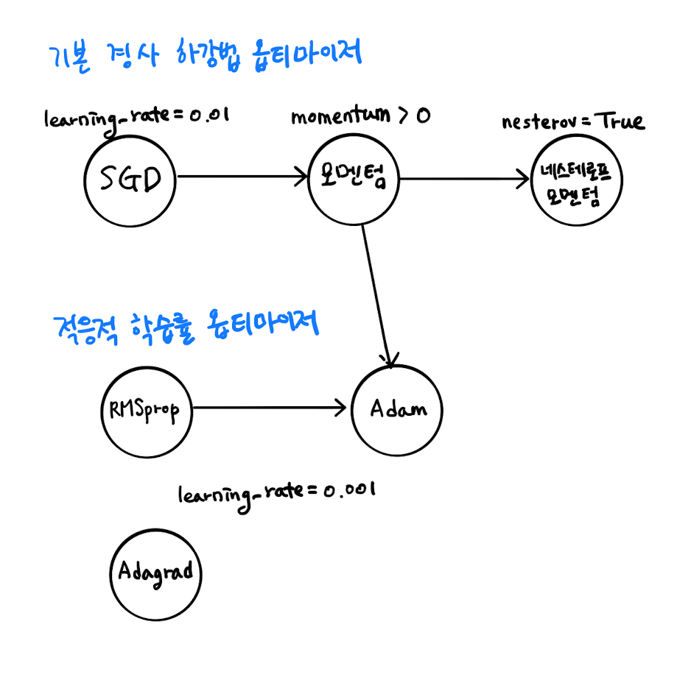

In [31]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(optimizer='adagrad', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8956 - loss: 0.2833
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9038 - loss: 0.2619
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9060 - loss: 0.2575
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9068 - loss: 0.2552
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9080 - loss: 0.2535


In [36]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8897 - loss: 0.3160


[0.3167785406112671, 0.8893333077430725]

In [34]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7978 - loss: 0.5721
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8530 - loss: 0.4045
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8701 - loss: 0.3565
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8794 - loss: 0.3297
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8879 - loss: 0.3118


In [37]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8897 - loss: 0.3160


[0.3167785406112671, 0.8893333077430725]

In [38]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# adam : 모멘텀 최적화와 RMSprop의 장점을 접목한 기법 (대부분 adam을 사용함)
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8914 - loss: 0.2970
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8995 - loss: 0.2757
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9044 - loss: 0.2617
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9088 - loss: 0.2485
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9126 - loss: 0.2384


In [39]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8856 - loss: 0.3441


[0.3451596796512604, 0.8833333253860474]